# 01.

# 02. Basic Algebra

## Subplots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [ ]:
# A figure with just one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

In [ ]:
# Stack vertically
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

In [ ]:
# Stack horizontally
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

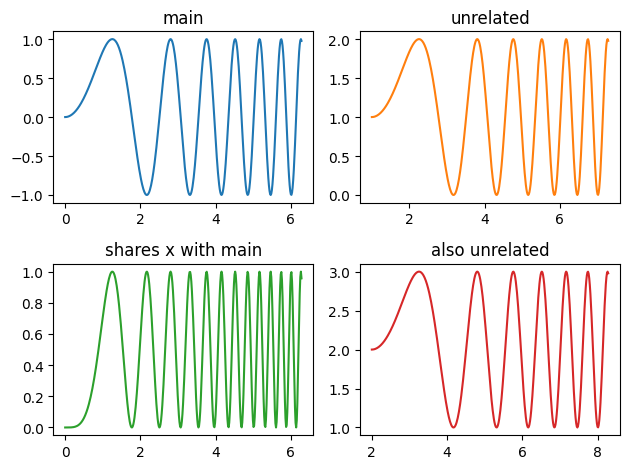

In [ ]:
# Stack horizontally and vertically 2
fig, axs = plt.subplots(2, 2, figsize=(3*2, 3*2))
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")

axs[0, 1].plot(x + 1, y + 1, 'tab:orange')
axs[0, 1].set_title("unrelated")

axs[1, 0].plot(x, y**2, 'tab:green')
axs[1, 0].set_title("shares x with main")

axs[1, 1].plot(x + 2, y + 2, 'tab:red')
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

## The Mandelbrot Set

Inspired by this notebook, which is adapted from the numpy docs

In [ ]:
import time

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print ('%r (%r, %r) %2.2f sec' % (method.__name__, args, kw, te-ts))
        return result

    return timed

In [ ]:
# Fast plotting
import numpy as np
import matplotlib.pyplot as plt

@timeit
def mandelbrot(height, width, maxit=20):
    """Returns an image of the Mandelbrot fractal of size height x width."""
    y, x = np.ogrid[ -1.4:1.4:height*1j, -2:0.8:width*1j ]
    c = x+y * 1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime

ax, fig = plt.subplots(figsize=(10,10))
plt.imshow(mandelbrot(400, 400, 500))
plt.show()

In [ ]:
# Faster plotting
import numpy as np
import matplotlib.pyplot as plt

@timeit
def mandelbrot(h, w, maxit=20):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > 2                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = 2                          # avoid diverging too much

    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))

# Python

##### List of random numbers

In [ ]:
import random

# Creates a list of 10 random integers between 1 and 100
random_numbers = [random.randint(1, 100) for _ in range(10)]

##### timeit decorator, returns (res, t in msec)

In [1]:
def timeit(func, return_result=False):
    """
    A decorator that measures the execution time of a function.

    Input: func (function): The function to be measured.
    Returns: function: A wrapper function that executes the given function and measures its execution time in milliseconds.
    """
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = 1000 * (end_time - start_time)
        if return_result:
            return result, total_time
        return total_time
    return timeit_wrapper

##### timeit_mean_msec decorator, return t in milliseconds

In [ ]:
from functools import wraps
import time

def timeit_mean_msec(n=100):
    """
    A decorator that measures the mean execution time of a function over n executions.

    Input: n (int): The number of times to execute the function. Defaults to 100.
    Returns: function: A wrapper function that executes the given function n times and measures its mean execution time in milliseconds.
    """
    def decorator(func):
        @wraps(func)
        def timeit_wrapper(*args, **kwargs):
            total_time = 0
            start_time = time.perf_counter()
            for _ in range(n):
                func(*args, **kwargs)
            end_time = time.perf_counter()
            total_time = end_time - start_time
            mean_time = (total_time / n) * 1000
            return mean_time
        return timeit_wrapper
    return decorator

##### apply a timeout to a function

In [2]:
import signal

def execute_with_timeout(seconds):
    """Decorator that applies a timeout to the function"""

    def raise_timeout(signum, frame):
        raise Exception()

    def decorator(func):
        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, raise_timeout)
            signal.alarm(seconds)
            try:
                return func(*args, **kwargs)
            finally:
                signal.alarm(0)
        return wrapper
    return decorator